BEGINNING OF THE PROJECT

Probelm Statement

In [249]:
# x variable independednt : other cols THAT DONT HAVE VERY HIGH CORR
# y variable target : close col

The art of forecasting stock prices has been a difficult task for many of the researchers and analysts. In fact, investors are highly interested in the research area of stock price prediction. For a good and successful investment, many investors are keen on knowing the future situation of the stock market. Good and effective prediction systems for the stock market help traders, investors, and analyst by providing supportive information like the future direction of the stock market.


In [250]:
############

DATA PREPROCESSING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel(r"StockPriceDataSet1.xlsx")

In [3]:
data.shape

(1009, 7)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


In [6]:
data.count()

Date         1009
Open         1009
High         1009
Low          1009
Close        1009
Adj Close    1009
Volume       1009
dtype: int64

In [7]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
#Hence we are blessed with a dataset with no null values or missing values

In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


FEATURE EXTRACTION

In [10]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [11]:
##first converting the date to a standardized form


In [12]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [13]:
#lovely dattime already so we can use the time func already


In [14]:
data[data['Date'].dt.year<2018].count()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
data[data['Date'].dt.year>=2018].count()

Date         1009
Open         1009
High         1009
Low          1009
Close        1009
Adj Close    1009
Volume       1009
dtype: int64

In [16]:
#dataset is for years abv 2018

In [17]:
#first we split the date-month-year into three seperate coloumns before scalin them down

In [18]:
data["Day"]=data['Date'].dt.day

In [19]:
data["Month"]=data["Date"].dt.month
data["Year"]=data["Date"].dt.year

In [20]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018


In [21]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,31,1,2022
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,1,2,2022
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,2,2,2022
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200,3,2,2022
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400,4,2,2022


In [22]:
# Scaling down the year 
def scale_down_year(year):
    x=year-2018+2
    year_scaledowned=x;
    return year_scaledowned
    # startintg from 2, so that ez to calc leap year
    
    

In [23]:
data['Year_sd']=data["Year"].apply(scale_down_year)

In [24]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,Year_sd
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018,2
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018,2
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018,2
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018,2
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018,2


In [25]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,Year_sd
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,31,1,2022,6
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,1,2,2022,6
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,2,2,2022,6
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200,3,2,2022,6
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400,4,2,2022,6


In [26]:
#beautiful so now year 2018 --> 2  till 2022 => 6 2020=4

In [27]:
import pandas as pd

def dmyToDays(row):
    day = row["Day"]
    month = row["Month"]
    year = row["Year"]   
    totaldays = 0
    for y in range(2016, year):
        if y % 4 == 0:
            totaldays += 366
        else:
            totaldays += 365
    for m in range(1, month):
        if m in [1, 3, 5, 7, 8, 10, 12]:
            totaldays += 31
        elif m == 2:
            if year % 4 == 0:
                totaldays += 29
            else:
                totaldays += 28
        else:
            totaldays += 30
    totaldays += day - 1  
    return totaldays

In [28]:
data["total_days"]=data.apply(dmyToDays,axis=1)

In [29]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,Year_sd,total_days
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018,2,766
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018,2,767
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018,2,768
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018,2,769
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018,2,770


In [30]:
#need to find coorelation etc and remove unnesscary cols wrt to stock price pred


In [31]:
# adding a id cols for data
data.shape

(1009, 12)

In [32]:
data.reset_index()

,index,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,Year_sd,total_days
0,0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018,2,766
1,1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018,2,767
2,2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018,2,768
3,3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018,2,769
4,4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018,2,770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,31,1,2022,6,2222
1005,1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,1,2,2022,6,2223
1006,1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,2,2,2022,6,2224
1007,1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200,3,2,2022,6,2225


In [33]:
data.shape

(1009, 12)

In [34]:
data.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Adj Close            float64
Volume                 int64
Day                    int64
Month                  int64
Year                   int64
Year_sd                int64
total_days             int64
dtype: object

In [35]:
data=data.reset_index()

In [36]:
data.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,Year_sd,total_days
0,0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018,2,766
1,1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018,2,767
2,2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018,2,768
3,3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018,2,769
4,4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018,2,770


In [37]:
data.tail()

,index,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,Year_sd,total_days
1004,1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,31,1,2022,6,2222
1005,1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,1,2,2022,6,2223
1006,1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,2,2,2022,6,2224
1007,1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200,3,2,2022,6,2225
1008,1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400,4,2,2022,6,2226


C:\Users\varun\AppData\Local\Temp\ipykernel_5892\2341293717.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


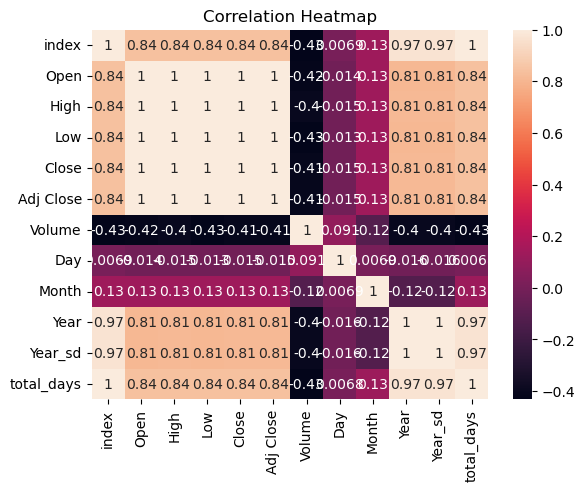

In [38]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()


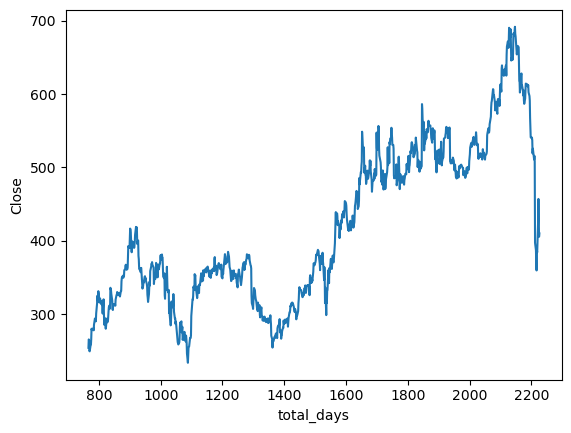

In [318]:
plot=sns.lineplot(x="total_days",y="Close",data=data)
# plot.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
plt.show()

In [319]:
data.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,Year_sd,total_days
0,0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018,2,766
1,1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018,2,767
2,2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018,2,768
3,3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018,2,769
4,4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018,2,770


In [330]:
data.drop(['Date','Year','Day','Month'],axis=1,inplace=True)

In [332]:
data.head()

,index,Open,High,Low,Close,Adj Close,Volume,Year_sd,total_days
0,0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2,766
1,1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2,767
2,2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2,768
3,3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2,769
4,4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2,770


In [333]:
#open , high , low ,close has perfect +ve corr with each other
#they have very weak -ve corr with day and considerably with month but very significant with year
#hence the stock price depends heavy on the year

In [335]:
column_names = data.iloc[:,1:5].columns.tolist()
column_names

['Open', 'High', 'Low', 'Close']

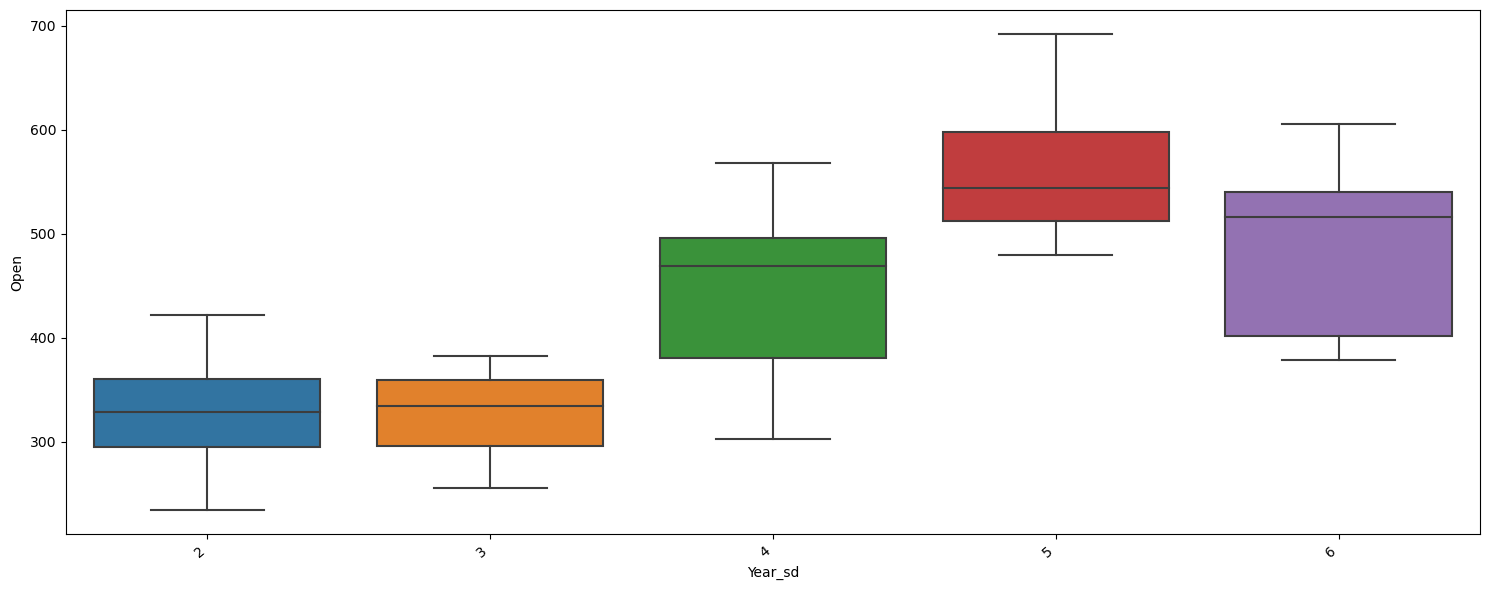

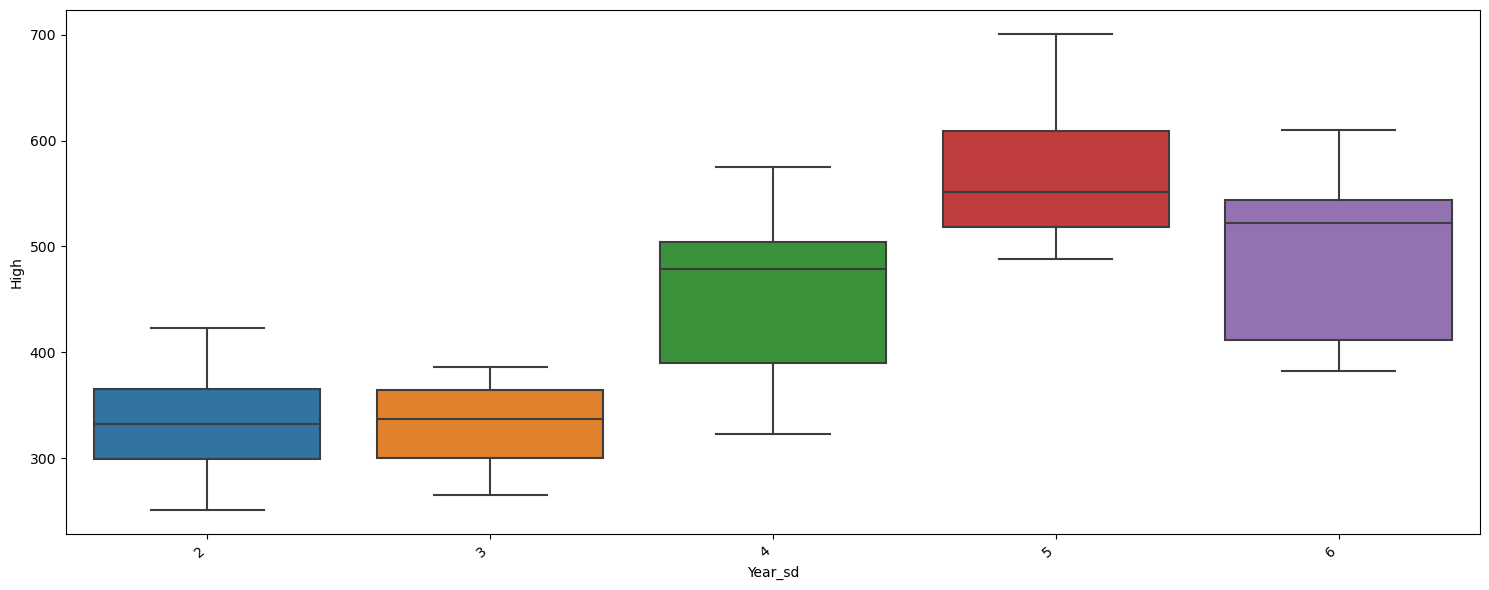

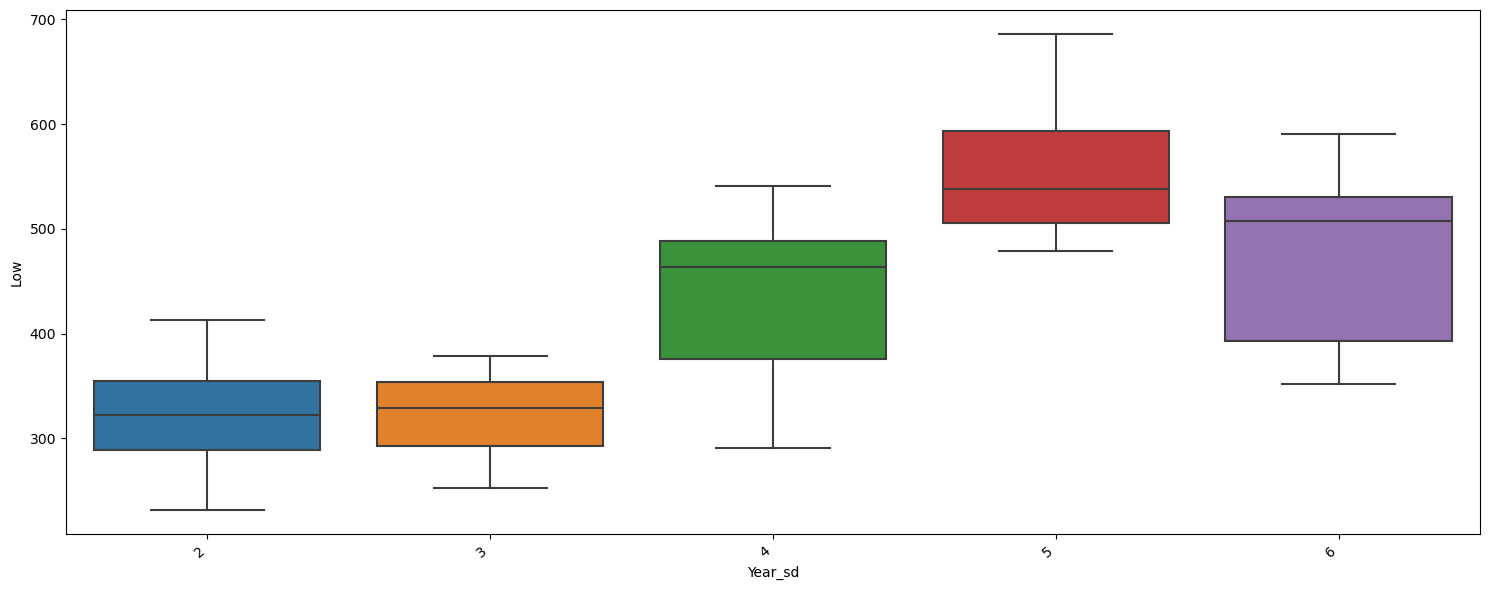

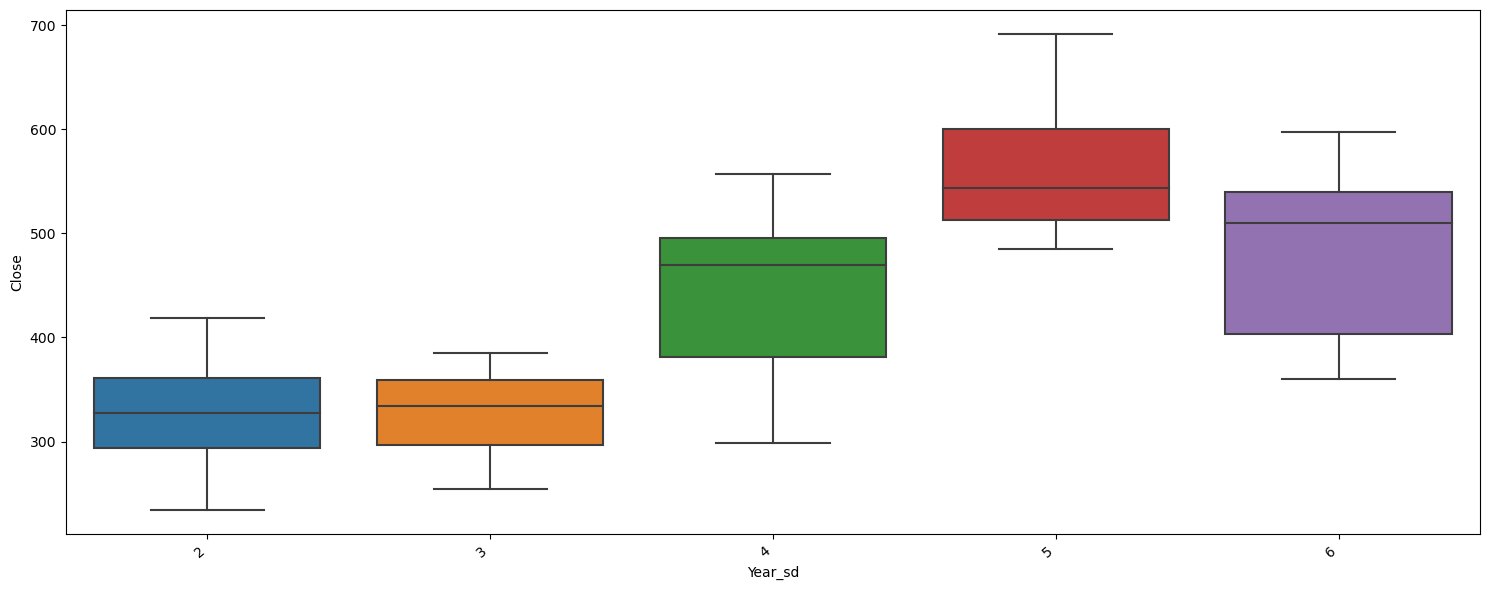

In [336]:
for i in range(4):
    plt.figure(figsize=(15,6))
    ax=sns.boxplot(x="Year_sd",y=column_names[i],data=data.sort_values('Year_sd',ascending=False))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
    plt.tight_layout()
    plt.show()

In [43]:
#no outliners

In [363]:
data.head()

,index,Open,High,Low,Close,Adj Close,Volume,Year_sd,total_days
0,0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2,766
1,1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2,767
2,2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2,768
3,3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2,769
4,4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2,770


In [364]:
#ds_copy=data.copy()

In [243]:
#data=ds_copy.copy()

In [46]:
# Lets Predict the closing price

In [47]:
# i need data where in target variable close is at the last

In [366]:
## NOT TAKIN OPEN HIGH LOW ADJ CLOSE , CUZ THEY HAVE CORR =1  , will be dropped
data.drop(['Open','High','Low'],axis=1,inplace=True)

In [367]:
data.head()

,index,Close,Adj Close,Volume,Year_sd,total_days
0,0,254.259995,254.259995,11896100,2,766
1,1,265.720001,265.720001,12595800,2,767
2,2,264.559998,264.559998,8981500,2,768
3,3,250.100006,250.100006,9306700,2,769
4,4,249.470001,249.470001,16906900,2,770


In [368]:
data.drop('Adj Close',axis=1,inplace=True)

In [369]:
data.head()

,index,Close,Volume,Year_sd,total_days
0,0,254.259995,11896100,2,766
1,1,265.720001,12595800,2,767
2,2,264.559998,8981500,2,768
3,3,250.100006,9306700,2,769
4,4,249.470001,16906900,2,770


In [370]:
#FOR PREDICTING CLOSE PRICE OF THE DAY
ds_close=data.copy()
temp_col=ds_close.columns.to_list()
new_col = temp_col[:1]+temp_col[2:]
new_col.append(temp_col[1])
print(new_col,'\n')
ds_close=ds_close.reindex(columns=new_col)
ds_close.head()

['index', 'Volume', 'Year_sd', 'total_days', 'Close'] 



,index,Volume,Year_sd,total_days,Close
0,0,11896100,2,766,254.259995
1,1,12595800,2,767,265.720001
2,2,8981500,2,768,264.559998
3,3,9306700,2,769,250.100006
4,4,16906900,2,770,249.470001


In [371]:
from sklearn.preprocessing import StandardScaler
scaler_close=StandardScaler()

In [372]:
ds_close=scaler_close.fit_transform(ds_close)

In [342]:
#scaled down

In [375]:
from sklearn.model_selection import train_test_split as tts
x_train_close= ds_close[:, 1:4] 
y_train_close=ds_close[:,-1]

In [376]:
x_train_close,x_test_close,y_train_close,y_test_close=tts(x_train_close,y_train_close,test_size=0.1,random_state= 100)
print(x_train_close.shape)
print(x_test_close.shape)
print(y_train_close.shape)
print(y_test_close.shape)

(908, 3)
(101, 3)
(908,)
(101,)


In [377]:
from sklearn.linear_model import LinearRegression
model_close=LinearRegression()
model_close.fit(x_train_close,y_train_close)

LinearRegression()

In [378]:
from sklearn.metrics import mean_squared_error, r2_score
def metrics(y_true,y_predicted):
    print(f'RMSE:', mean_squared_error(y_true,y_predicted)**0.5)
    print(f'MSE:', mean_squared_error(y_true,y_predicted))
    print(f'R2:',r2_score(y_true,y_predicted))


In [379]:
y_predicted_close=model_close.predict(x_test_close)
metrics(y_test_close,y_predicted_close)


RMSE: 0.49151783509552205
MSE: 0.2415897822169888
R2: 0.766577008251


In [380]:
from sklearn.model_selection import cross_val_score
scores_close = cross_val_score(model_close, x_train_close, y_train_close, cv=5, scoring='r2').mean()
print(scores_close)

0.6955705258534393


In [381]:
#RANDOM FORREST

In [382]:
from sklearn.ensemble import RandomForestRegressor

model_random_forest = RandomForestRegressor(n_estimators = 100 , min_samples_split = 10)
model_random_forest.fit(x_train_close,y_train_close)

RandomForestRegressor(min_samples_split=10)

In [383]:
pred_rf=model_random_forest.predict(x_test_close)

In [384]:
metrics(y_test_close,pred_rf)

RMSE: 0.09764564665346873
MSE: 0.009534672310374068
R2: 0.9907876412834592


THANKS
->VARUN VETRIVENDAN :)
